<h1>H1-B Visa Approval Prediction

<h1>Name - Alan Joe Anil

<h1>Technocolabs Data-Scientist-Internship

<h1>Feature Engineering and Model Building

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel (r'/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/h_1b_vissanew.xlsx')

In [7]:
df2 = df

In [8]:
df2.head()

,Unnamed: 0,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,...,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
0,0,WITHDRAWN,H-1B,"R/GA MEDIA GROUP, INC.",N,Y,ASSOCIATE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,0,0.0,0,0,N,Y,N,179000.0,Year,1.0
1,1,WITHDRAWN,E-3 Australian,MOTHER INDUSTRIES LLC,N,Y,ACCOUNT SUPERVISOR (MOTHER),ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,0,0.0,0,0,N,Y,N,110000.0,Year,1.0
2,2,WITHDRAWN,E-3 Australian,"WE ARE UNLIMITED, INC.",N,Y,EXECUTIVE CREATIVE DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,1,0.0,0,0,N,Y,N,275000.0,Year,1.0
3,3,WITHDRAWN,E-3 Australian,"HELLO ELEPHANT, LLC",N,Y,PROJECT MANAGEMENT LEAD,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,1,0.0,0,0,N,Y,N,140000.0,Year,1.0
4,4,WITHDRAWN,E-3 Australian,"HELLO ELEPHANT, LLC",N,Y,"CREATIVE DIRECTOR, UX",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,...,1,0.0,0,0,N,Y,N,180000.0,Year,1.0


In [9]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [10]:
print(df2.shape)

(664616, 20)


column datatypes

In [11]:
catvars = df2.select_dtypes(include=['object']).columns
numvars = df2.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1',
        'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE',
        'CONTINUED_EMPLOYMENT', 'H-1B_DEPENDENT', 'SUPPORT_H1B',
        'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1'],
       dtype='object'),
 Index(['NAICS_CODE', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
        'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'WAGE_RATE_OF_PAY_FROM_1',
        'TOTAL_WORKER_POSITIONS'],
       dtype='object'))

Display Unique values in each Columns

In [12]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df2[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df2[col].value_counts()}')

    
for col in df2.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col CASE_STATUS is : ['WITHDRAWN' 'CERTIFIED-WITHDRAWN' 'CERTIFIED' 'DENIED']
---------------------------------------------------------------------------
Details of the particular col VISA_CLASS is : ['H-1B' 'E-3 Australian' 'H-1B1 Singapore' 'H-1B1 Chile']
---------------------------------------------------------------------------
Details of the particular col EMPLOYER_NAME is : ['R/GA MEDIA GROUP, INC.' 'MOTHER INDUSTRIES LLC' 'WE ARE UNLIMITED, INC.'
 ... 'EVEREST CONSULTANTS, INC.' 'EMBRAER EXECUTIVE AIRCRAFT, INC.'
 'PORT LOGISTICS TERMINAL OPERATIONS, LLC']
---------------------------------------------------------------------------
Details of the particular col SECONDARY_ENTITY_1 is : ['N' 'Y']
---------------------------------------------------------------------------
Details of the particular col AGENT_REPRESENTING_EMPLOYER is : ['Y' 'N']
---------------------------------------------------------------------------
Details of the particular col JOB_TITLE

On **VISA CLASS** we only want **H1-B Visa** so we drop other visa class

In [17]:
df2 = df2.drop(df2.index[df2['VISA_CLASS'].isin(["H-1B1 Chile","E-3 Australian","H-1B1 Singapore"])])

replace CERTIFIED-WITHDRAWN with CERTIFIED and WITHDRAWN with DENIED

In [18]:
df2['CASE_STATUS'] = df2['CASE_STATUS'].replace({'CERTIFIED-WITHDRAWN':'CERTIFIED', 'WITHDRAWN':'DENIED'})
df2['CASE_STATUS'].value_counts()

CERTIFIED    624690
DENIED        24393
Name: CASE_STATUS, dtype: int64

<h2> Feature Engineering

Check corelation

In [19]:
df2.corr()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,TOTAL_WORKER_POSITIONS
NAICS_CODE,1.000000,-0.030240,-0.038001,-0.095612,-0.115130,-0.013102,-0.103594
CHANGE_PREVIOUS_EMPLOYMENT,-0.030240,1.000000,0.298329,0.410118,0.513815,0.019494,0.502481
NEW_CONCURRENT_EMPLOYMENT,-0.038001,0.298329,1.000000,0.235493,0.293540,-0.040182,0.375202
CHANGE_EMPLOYER,-0.095612,0.410118,0.235493,1.000000,0.520204,0.071655,0.570483
AMENDED_PETITION,-0.115130,0.513815,0.293540,0.520204,1.000000,0.020817,0.597583
WAGE_RATE_OF_PAY_FROM_1,-0.013102,0.019494,-0.040182,0.071655,0.020817,1.000000,0.011393
TOTAL_WORKER_POSITIONS,-0.103594,0.502481,0.375202,0.570483,0.597583,0.011393,1.000000


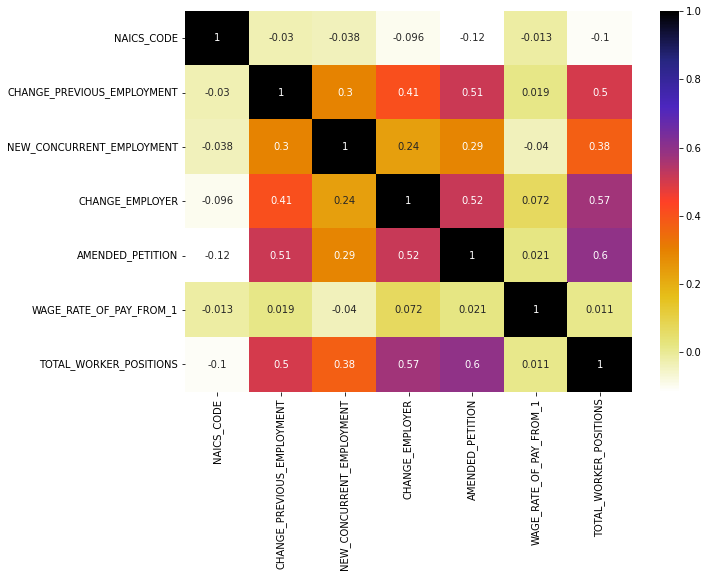

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
def correlation(df2, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(df2, 0.7)
len(set(corr_features))

0

Handling Null Values

In [23]:
null_value = df2.isnull().sum().sort_values(ascending=False)
null_value_per = df2.isnull().mean().sort_values(ascending=False)*100

In [24]:
null_value_df = pd.DataFrame({
    "Features" : null_value.index,
    "No.of Missing_Value" :null_value.values,
    "Percentages of Missing_Value" : null_value_per.values
})
null_value_df

,Features,No.of Missing_Value,Percentages of Missing_Value
0,EMPLOYER_NAME,10,0.001541
1,WAGE_UNIT_OF_PAY_1,7,0.001078
2,WAGE_RATE_OF_PAY_FROM_1,7,0.001078
3,SOC_TITLE,4,0.000616
4,SOC_CODE,4,0.000616
5,TOTAL_WORKER_POSITIONS,2,0.000308
6,NAICS_CODE,2,0.000308
7,JOB_TITLE,1,0.000154
8,NEW_CONCURRENT_EMPLOYMENT,1,0.000154
9,AMENDED_PETITION,0,0.000000


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649083 entries, 0 to 664615
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  649083 non-null  object 
 1   VISA_CLASS                   649083 non-null  object 
 2   EMPLOYER_NAME                649073 non-null  object 
 3   SECONDARY_ENTITY_1           649083 non-null  object 
 4   AGENT_REPRESENTING_EMPLOYER  649083 non-null  object 
 5   JOB_TITLE                    649082 non-null  object 
 6   SOC_TITLE                    649079 non-null  object 
 7   SOC_CODE                     649079 non-null  object 
 8   NAICS_CODE                   649081 non-null  float64
 9   CONTINUED_EMPLOYMENT         649083 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   649083 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    649082 non-null  float64
 12  CHANGE_EMPLOYER              649083 non-null  int64  
 13 

In [26]:
df2 = df2.dropna()

In [27]:
df2.apply(lambda x: sum(x.isnull()))

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
SECONDARY_ENTITY_1             0
AGENT_REPRESENTING_EMPLOYER    0
JOB_TITLE                      0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
dtype: int64

Handling imbalanced data

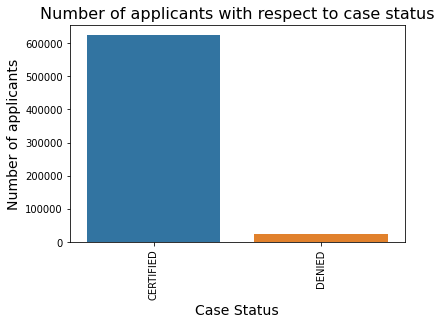

In [28]:
status = df2['CASE_STATUS'].value_counts()
sns.barplot(status.index, status.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Case Status', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to case status", fontsize=16)
plt.show()

In [29]:
#Down sampling
class_certified, class_denied = df2.CASE_STATUS.value_counts()
# Divide by class
df2_class_c = df2[df2.CASE_STATUS=='CERTIFIED']
df2_class_d = df2[df2.CASE_STATUS=='DENIED']

seed=7
df2_class_c_under =df2_class_c.sample(class_denied,random_state=seed)
df2_down = pd.concat([df2_class_c_under, df2_class_d], axis=0)

print('Random under-sampling:')
print(df2.CASE_STATUS.value_counts())
print('After Downsampling:')
print(df2_down.CASE_STATUS.value_counts())

Random under-sampling:
CERTIFIED    624681
DENIED        24377
Name: CASE_STATUS, dtype: int64
After Downsampling:
CERTIFIED    24377
DENIED       24377
Name: CASE_STATUS, dtype: int64


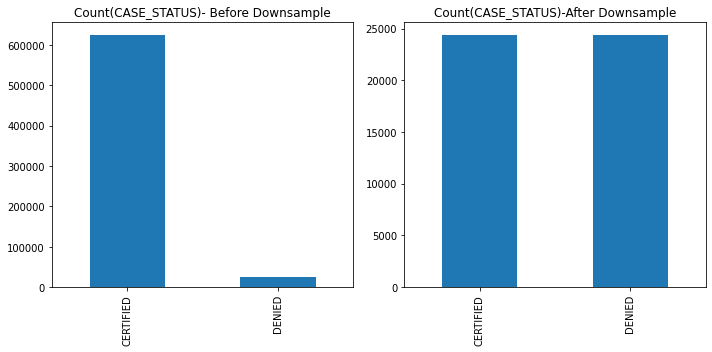

In [30]:
#Graph before after down sampling
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
df2['CASE_STATUS'].value_counts().plot(kind='bar', title='Count(CASE_STATUS)- Before Downsample');
plt.subplot(1, 2, 2)
df2_down.CASE_STATUS.value_counts().plot(kind='bar', title='Count(CASE_STATUS)-After Downsample');
plt.tight_layout()
plt.show()

In [ ]:
#unbalance Data
#df2_down = df2

In [31]:
df2_down.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
154076,CERTIFIED,H-1B,"TECH MAHINDRA (AMERICAS),INC.",Y,N,COMPUTER SYSTEMS ANALYST,COMPUTER SYSTEMS ANALYSTS,15-1121,541511.0,1,0,0.0,0,0,Y,Y,N,85118.0,Year,1.0
94459,CERTIFIED,H-1B,MATERIALS SOFTWARE SYSTEMS INC,Y,Y,PROGRAMMER ANALYST,COMPUTER SYSTEMS ANALYSTS,15-1121,541519.0,1,0,0.0,0,0,Y,Y,N,84926.0,Year,1.0
364396,CERTIFIED,H-1B,"INFOSEMANTICS, INC.",Y,Y,INFRASTRUCTURE ENGINEER,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,541519.0,0,0,0.0,0,0,N,Y,N,82000.0,Year,1.0
560083,CERTIFIED,H-1B,"BIOMEDICAN, INC.",N,Y,SENIOR DESIGN ENGINEER,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",17-2072,541711.0,0,0,0.0,0,0,N,Y,N,110000.0,Year,1.0
226929,CERTIFIED,H-1B,PROFESSIONAL VISION TECHNOLOGIES INC,Y,N,SOFTWARE DEVELOPER,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,541511.0,0,0,0.0,0,1,Y,Y,N,79560.0,Year,1.0


In [32]:
print(df2_down.shape)

(48754, 20)


In [33]:
catvars1 = df2_down.select_dtypes(include=['object']).columns
numvars1 = df2_down.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars1,numvars1

(Index(['CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1',
        'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE',
        'CONTINUED_EMPLOYMENT', 'H-1B_DEPENDENT', 'SUPPORT_H1B',
        'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1'],
       dtype='object'),
 Index(['NAICS_CODE', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
        'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'WAGE_RATE_OF_PAY_FROM_1',
        'TOTAL_WORKER_POSITIONS'],
       dtype='object'))

outliers

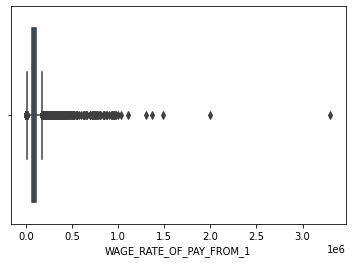

In [34]:
sns.boxplot(df2_down['WAGE_RATE_OF_PAY_FROM_1'])

In [35]:
q1 = df2_down["WAGE_RATE_OF_PAY_FROM_1"].quantile(0.25)
q3 = df2_down["WAGE_RATE_OF_PAY_FROM_1"].quantile(0.75)
IQR = q3 - q1
outliers = ((df2_down["WAGE_RATE_OF_PAY_FROM_1"] < (q1 - 1.5 * IQR)) | (df2_down["WAGE_RATE_OF_PAY_FROM_1"] > (q3 + 1.5 * IQR))).sum()
print('No of outliers: ', outliers)

No of outliers:  5725


In [36]:
df2_down = df2_down.drop(df2_down[df2_down.WAGE_RATE_OF_PAY_FROM_1 < (q1 - 1.5 * IQR)].index)
df2_down = df2_down.drop(df2_down[df2_down.WAGE_RATE_OF_PAY_FROM_1 > (q1 + 1.5 * IQR)].index)

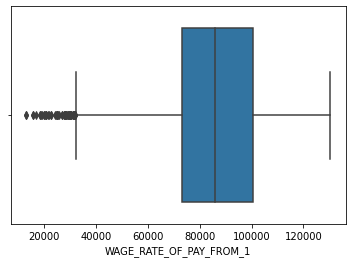

In [37]:
sns.boxplot(df2_down['WAGE_RATE_OF_PAY_FROM_1'])

In [38]:
print(df2_down.shape)

(38369, 20)


In [39]:
df2_down.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
154076,CERTIFIED,H-1B,"TECH MAHINDRA (AMERICAS),INC.",Y,N,COMPUTER SYSTEMS ANALYST,COMPUTER SYSTEMS ANALYSTS,15-1121,541511.0,1,0,0.0,0,0,Y,Y,N,85118.0,Year,1.0
94459,CERTIFIED,H-1B,MATERIALS SOFTWARE SYSTEMS INC,Y,Y,PROGRAMMER ANALYST,COMPUTER SYSTEMS ANALYSTS,15-1121,541519.0,1,0,0.0,0,0,Y,Y,N,84926.0,Year,1.0
364396,CERTIFIED,H-1B,"INFOSEMANTICS, INC.",Y,Y,INFRASTRUCTURE ENGINEER,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,541519.0,0,0,0.0,0,0,N,Y,N,82000.0,Year,1.0
560083,CERTIFIED,H-1B,"BIOMEDICAN, INC.",N,Y,SENIOR DESIGN ENGINEER,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",17-2072,541711.0,0,0,0.0,0,0,N,Y,N,110000.0,Year,1.0
226929,CERTIFIED,H-1B,PROFESSIONAL VISION TECHNOLOGIES INC,Y,N,SOFTWARE DEVELOPER,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,541511.0,0,0,0.0,0,1,Y,Y,N,79560.0,Year,1.0


<h3> Find Duplicates and Treat it

In [40]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df2_down[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df2_down[col].value_counts()}')

    
for col in df2_down.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col CASE_STATUS is : ['CERTIFIED' 'DENIED']
---------------------------------------------------------------------------
Details of the particular col VISA_CLASS is : ['H-1B']
---------------------------------------------------------------------------
Details of the particular col EMPLOYER_NAME is : ['TECH MAHINDRA (AMERICAS),INC.' 'MATERIALS SOFTWARE SYSTEMS INC'
 'INFOSEMANTICS, INC.' ... 'NATIONAL AIR CARGO GROUP INC.'
 'MAUNA LOA HELICOPTER TOURS LLC' 'FIERI SB INC']
---------------------------------------------------------------------------
Details of the particular col SECONDARY_ENTITY_1 is : ['Y' 'N']
---------------------------------------------------------------------------
Details of the particular col AGENT_REPRESENTING_EMPLOYER is : ['N' 'Y']
---------------------------------------------------------------------------
Details of the particular col JOB_TITLE is : ['COMPUTER SYSTEMS ANALYST' 'PROGRAMMER ANALYST' 'INFRASTRUCTURE ENGINEER'
 ... 'B747 FIR

In [41]:
df2_down['CONTINUED_EMPLOYMENT'].unique()

array([1, 0, '0', '1', 2, 5, 3, '3', '5', '01', 4, '15', '10', 10, 25, 12,
       6, '2', 8, '4', 50, 15, '6', 'B', 20], dtype=object)

In [42]:
df2_down['CONTINUED_EMPLOYMENT'] = df2_down['CONTINUED_EMPLOYMENT'].replace({ '0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'01': 1,'15': 15})

In [43]:
df2_down = df2_down.drop(df2_down.index[df2_down['CONTINUED_EMPLOYMENT'].isin(['B'])])

In [44]:
df2_down['CONTINUED_EMPLOYMENT'].value_counts()

0     29709
1      8224
5       226
2        75
4        42
3        29
10       22
10       18
15        6
25        4
8         4
20        3
6         2
12        1
50        1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [45]:
df2_down['NEW_CONCURRENT_EMPLOYMENT'].value_counts()

0.0    38221
1.0      112
4.0       12
5.0       12
2.0        6
3.0        3
Name: NEW_CONCURRENT_EMPLOYMENT, dtype: int64

In [46]:
df2_down['TOTAL_WORKER_POSITIONS'].value_counts()

1.0      36430
3.0        355
2.0        335
15.0       271
10.0       255
5.0        241
4.0         76
6.0         69
30.0        68
20.0        65
50.0        65
25.0        60
8.0         14
24.0        12
75.0         8
100.0        7
12.0         7
7.0          6
40.0         4
11.0         3
35.0         2
13.0         2
16.0         2
150.0        1
22.0         1
34.0         1
175.0        1
19.0         1
28.0         1
23.0         1
9.0          1
45.0         1
Name: TOTAL_WORKER_POSITIONS, dtype: int64

In [47]:
df2_down['WAGE_RATE_OF_PAY_FROM_1'].value_counts()

100000.0    766
90000.0     751
110000.0    731
85000.0     683
120000.0    683
           ... 
52853.0       1
92150.0       1
51746.0       1
74974.0       1
54246.0       1
Name: WAGE_RATE_OF_PAY_FROM_1, Length: 7778, dtype: int64

In [48]:
df2_down['NEW_CONCURRENT_EMPLOYMENT'].value_counts()

0.0    38221
1.0      112
4.0       12
5.0       12
2.0        6
3.0        3
Name: NEW_CONCURRENT_EMPLOYMENT, dtype: int64

In [49]:
df2_down['NAICS_CODE'].value_counts()

541511.0    12515
541512.0     3504
54151.0      1976
611310.0     1877
5416.0       1047
            ...  
33631.0         1
2371.0          1
493130.0        1
321918.0        1
481219.0        1
Name: NAICS_CODE, Length: 1159, dtype: int64

In [50]:
# converting float to int
df2_down = df2_down.astype({"TOTAL_WORKER_POSITIONS":'int', "NEW_CONCURRENT_EMPLOYMENT":'int', "WAGE_RATE_OF_PAY_FROM_1":'int', "NAICS_CODE":'int'}) 

In [51]:
df2_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38366 entries, 154076 to 664578
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CASE_STATUS                  38366 non-null  object
 1   VISA_CLASS                   38366 non-null  object
 2   EMPLOYER_NAME                38366 non-null  object
 3   SECONDARY_ENTITY_1           38366 non-null  object
 4   AGENT_REPRESENTING_EMPLOYER  38366 non-null  object
 5   JOB_TITLE                    38366 non-null  object
 6   SOC_TITLE                    38366 non-null  object
 7   SOC_CODE                     38366 non-null  object
 8   NAICS_CODE                   38366 non-null  int64 
 9   CONTINUED_EMPLOYMENT         38366 non-null  object
 10  CHANGE_PREVIOUS_EMPLOYMENT   38366 non-null  int64 
 11  NEW_CONCURRENT_EMPLOYMENT    38366 non-null  int64 
 12  CHANGE_EMPLOYER              38366 non-null  int64 
 13  AMENDED_PETITION         

In [52]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df2_down[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df2_down[col].value_counts()}')

    
for col in df2_down.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col CASE_STATUS is : ['CERTIFIED' 'DENIED']
---------------------------------------------------------------------------
Details of the particular col VISA_CLASS is : ['H-1B']
---------------------------------------------------------------------------
Details of the particular col EMPLOYER_NAME is : ['TECH MAHINDRA (AMERICAS),INC.' 'MATERIALS SOFTWARE SYSTEMS INC'
 'INFOSEMANTICS, INC.' ... 'NATIONAL AIR CARGO GROUP INC.'
 'MAUNA LOA HELICOPTER TOURS LLC' 'FIERI SB INC']
---------------------------------------------------------------------------
Details of the particular col SECONDARY_ENTITY_1 is : ['Y' 'N']
---------------------------------------------------------------------------
Details of the particular col AGENT_REPRESENTING_EMPLOYER is : ['N' 'Y']
---------------------------------------------------------------------------
Details of the particular col JOB_TITLE is : ['COMPUTER SYSTEMS ANALYST' 'PROGRAMMER ANALYST' 'INFRASTRUCTURE ENGINEER'
 ... 'B747 FIR

<h3>Replace some catagorical to numeric 

In [ ]:
#CASE_STATUS is : ['CERTIFIED' 'DENIED']
#VISA_CLASS is : ['H-1B']
#SECONDARY_ENTITY_1 is : ['Y' 'N']
#AGENT_REPRESENTING_EMPLOYER is : ['N' 'Y']
#H-1B_DEPENDENT is : ['Y' 'N']
#SUPPORT_H1B is : ['Y' 'N']
#WILLFUL_VIOLATOR is : ['N' 'Y']
#WAGE_UNIT_OF_PAY_1 is : ['Year' 'Hour' 'Month' 'Bi-Weekly' 'Week']

In [53]:
df2_down['CASE_STATUS'] = df2_down['CASE_STATUS'].replace({ 'DENIED': 0,'CERTIFIED': 1})
df2_down['VISA_CLASS'] = df2_down['VISA_CLASS'].replace({ 'H-1B': 1})
df2_down['SECONDARY_ENTITY_1'] = df2_down['SECONDARY_ENTITY_1'].replace({ 'N': 0,'Y': 1})
df2_down['AGENT_REPRESENTING_EMPLOYER'] = df2_down['AGENT_REPRESENTING_EMPLOYER'].replace({ 'N': 0,'Y': 1})
df2_down['H-1B_DEPENDENT'] = df2_down['H-1B_DEPENDENT'].replace({ 'N': 0,'Y': 1})
df2_down['SUPPORT_H1B'] = df2_down['SUPPORT_H1B'].replace({ 'N': 0,'Y': 1})
df2_down['WILLFUL_VIOLATOR'] = df2_down['WILLFUL_VIOLATOR'].replace({ 'N': 0,'Y': 1})
df2_down['WAGE_UNIT_OF_PAY_1'] = df2_down['WAGE_UNIT_OF_PAY_1'].replace({ 'Year': 0,'Hour': 1,'Month': 2,'Bi-Weekly': 3,'Week': 4})

In [54]:
df2_down2 = df2_down

In [55]:
df2_down2.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
154076,1,1,"TECH MAHINDRA (AMERICAS),INC.",1,0,COMPUTER SYSTEMS ANALYST,COMPUTER SYSTEMS ANALYSTS,15-1121,541511,1,0,0,0,0,1,1,0,85118,0,1
94459,1,1,MATERIALS SOFTWARE SYSTEMS INC,1,1,PROGRAMMER ANALYST,COMPUTER SYSTEMS ANALYSTS,15-1121,541519,1,0,0,0,0,1,1,0,84926,0,1
364396,1,1,"INFOSEMANTICS, INC.",1,1,INFRASTRUCTURE ENGINEER,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,541519,0,0,0,0,0,0,1,0,82000,0,1
560083,1,1,"BIOMEDICAN, INC.",0,1,SENIOR DESIGN ENGINEER,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",17-2072,541711,0,0,0,0,0,0,1,0,110000,0,1
226929,1,1,PROFESSIONAL VISION TECHNOLOGIES INC,1,0,SOFTWARE DEVELOPER,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,541511,0,0,0,0,1,1,1,0,79560,0,1


<h4>There are also many unique values in *SOC_TiTLE* column. I have created a dictionary to find out the data that are belonged to specific occupation section. I have created 13 categories for this purpose. Then put the values in **Other** category that have application number less than 5.

In [57]:
#remove special characters to uniform format
df2_down2['SOC_TITLE']=df2_down2['SOC_TITLE'].str.lower()
soc = {
   'SOC_NAME': {
      r"[*.\-,);\"'(+/]|<font>|</font>|(^[0-9]$)":'', r'&amp|&':' and ',
      r'^compute|^computer|^copmuter|^computers|^comuter|^compuer':'computer',
      r'induatrial':'industrial',
      r'engineers|enginers|engineering|engineerarquitects|enigneers|engineerarchitect':'engineer',
      r'analysta|analystt|analyhsts|analys$|anlysts':'analyst',
      r'sofware|softare|softwware':'software',
      r'^all other|all other$|other$|all othter$':'',
      r'systemanalyst':'system analyst',
      r'hardward':'hardware',
      r'aplications|applications|appllications|applicationsssss':'application',
      r'dvelopers|developers|developpers': 'developer',
      r'datebase':'database',
      r'maanger|mangers|managerse|managers':'manager', 
      r'sysems|systems':'system', 
      r'technicans|technicians':'technician',
      r'deisgners|designers':'designer',
      r'operations':'operation', 
      r'except computer non|except computer|except compuer':'', 
      r'software application developer|application developer':'software developer application'}                    
}

df2_down2.replace(soc, regex=True, inplace=True)
df2_down2=df2_down2[~df2_down2['SOC_TITLE'].str.contains('^[0-9]*$',na=False)]

In [58]:
job_sector = {
   'SOC_TITLE': {
      r".*agricultural(?s).*|.*maids(?s).*|.*cleaner(?s).*|.*bakers(?s).*|.*bartenders(?s).*|.*chefs(?s).*|.*butchers(?s).*|.*meat(?s).*|dishwashers|^laundry(?s).*|^funeral(?s).*|.*janitor(?s).*|^housekeeping(?s).*|^farmworkers and laborers, crop, nursery, and greenhouse(?s).*|^cook(?s).*|.*food(?s).*":'Food & Service',
      r'^computer(?s).*|^information security(?s).*|^web developer(?s).*|^database(?s).*|^data warehousing(?s).*|^graphic(?s).*|^network and computer(?s).*|.*network system(?s).*|^software(?s).*|^analyst(?s).*|^information technology(?s).*':'IT Profession',
      r".*mathematician(?s).*|.*statisticians(?s).*|statistican|biostatisticians":'Mathematician',  
      r'.*survey(?s).*|.*school(?s).*|.*secondary school(?s).*|.*elementary school(?s).*|.*teachers(?s).*|.*postsecondary(?s).*|.*educators(?s).*|.*research assistants(?s).*|.*education(?s).*|.*translators(?s).*|.*training(?s).*|.*instructors(?s).*|.*librarians(?s).*|.*instructional coordinators(?s).*':'Teaching & Education',
      r'.*physician assistants(?s).*|.*orthodontists(?s).*|.*optometrists(?s).*|.*epidemiologists(?s).*|.*anesthesiologists(?s).*|.*rehabilitation(?s).*|.*dietitians(?s).*|.*nutritionists(?s).*|.*gynecologists(?s).*|.*mental(?s).*|.*health(?s).*|^biochemists(?s).*|^healthcare(?s).*|^health diagnosing(?s).*|.*pediatricians(?s).*|.*surgeons(?s).*|.*physical(?s).*|physicists|.*medical(?s).*|.*nurses(?s).*|.*pathologists(?s).*|.*practitioners$|.*psychiatrists(?s).*|veterinarians|pharmacists|^radiologists(?s).*|.*exercise physiologists(?s).*|.*therapists(?s).*|.*psychologists, all other(?s).*|neurologists|.*dentists(?s).*':'Medical', 
      r'.*loan(?s).*|.*property(?s).*|.*credit analysts(?s).*|.*financial(?s).*|^budget(?s).*|.*bill(?s).*|.*account(?s).*|.*accountants(?s).*|economists|^cost(?s).*|^statistical assistants(?s).*|^business operation specialists(?s).*|.*fiancial(?s).*':'Finance',
      r'.*aircraft(?s).*|.*operating engineer(?s).*|.*structural(?s).*|.*engineer(?s).*|.*electrical(?s).*|.*electronics(?s).*|.*designer(?s).*|.*construction laborers(?s).*|.*architect(?s).*':'Architecture & Engineering',   
      r'.*biologist(?s).*|.*astronomers(?s).*|.*microbiologists(?s).*|.*biophysicist(?s).*|.*scienctists(?s).*|.*scientists(?s).*|chemists|^biological scientists $|^biomedical(?s).*':'Advance Science',
      r'.*manager(?s).*|operations research analysts|.*management(?s).*|chief executives|public relations specialists|logisticians|administrative services manager|.*planners(?s).*|human resources specialists|lodging manager|engineer manager':'Management',
      r'.*market(?s).*|.*marketing(?s).*|.*wholesale(?s).*|^sales(?s).*|^advertising(?s).*|compliance officers|.*salespersons$':'Marketing',
      r'.*judicial(?s).*|.*police(?s).*|.*law(?s).*|lawyers|.*judges(?s).*|.*clergy(?s).*|.*attorney(?s).*|.*clergy(?s).*|.*counselors, all other(?s).*|.*paralegals(?s).*|.*legal(?s).*':'Government Service',
      r'.*technician(?s).*|.*operators(?s).*|.*technologists(?s).*':'Technician',
      r'.*drivers(?s).*|.*logistics(?s).*|.*cargo and freight agents(?s).*':'Logistics',
      r'.*audio(?s).*|.*photo(?s).*|.*recreation(?s).*|.*artists(?s).*|.*auditors(?s).*|.*athletic(?s).*|.*video(?s).*|.*writers(?s).*|.*music(?s).*|.*models(?s).*|composers|.*media(?s).*|singers|.*dancers(?s).*|poets and lyricists|coaches and scouts|.*sport(?s).*|.*fashion(?s).*|^media and communication workers$|^multimedia artists and animators|editors|^set designer$|^producers and directors$|^art directors$|^designer$|^reporters and correspondents$|.*entertainment(?s).*':'Fashion & Entertainment',
   } 
}
df2_down2.replace(job_sector, regex=True, inplace=True)

In [59]:
cdf_dict=df2_down2['SOC_TITLE'].value_counts().to_dict()
soc_list = [k for k,v in cdf_dict.items() if v<=5]
len(soc_list)
df2_down2.SOC_TITLE = np.where(df2_down2['SOC_TITLE'].isin(soc_list), 'Others', df2_down2.SOC_TITLE)

In [60]:
df2_down2['SOC_TITLE'].value_counts()

IT Profession                                           25948
Architecture & Engineering                               3620
Management                                               2060
Finance                                                  1602
Medical                                                  1553
Teaching & Education                                     1090
Advance Science                                           712
Mathematician                                             574
Marketing                                                 513
Fashion & Entertainment                                   169
Government Service                                        130
Technician                                                 87
Others                                                     83
Food & Service                                             83
actuaries                                                  43
business operations specialists, all other                 34
compensa

In [61]:
df2_down2.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
154076,1,1,"TECH MAHINDRA (AMERICAS),INC.",1,0,COMPUTER SYSTEMS ANALYST,IT Profession,15-1121,541511,1,0,0,0,0,1,1,0,85118,0,1
94459,1,1,MATERIALS SOFTWARE SYSTEMS INC,1,1,PROGRAMMER ANALYST,IT Profession,15-1121,541519,1,0,0,0,0,1,1,0,84926,0,1
364396,1,1,"INFOSEMANTICS, INC.",1,1,INFRASTRUCTURE ENGINEER,IT Profession,15-1132,541519,0,0,0,0,0,0,1,0,82000,0,1
560083,1,1,"BIOMEDICAN, INC.",0,1,SENIOR DESIGN ENGINEER,Architecture & Engineering,17-2072,541711,0,0,0,0,0,0,1,0,110000,0,1
226929,1,1,PROFESSIONAL VISION TECHNOLOGIES INC,1,0,SOFTWARE DEVELOPER,IT Profession,15-1132,541511,0,0,0,0,1,1,1,0,79560,0,1


In [64]:
#df2_down2.to_excel("/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/h_1b_vissanewFeatureengg.xlsx")

drop unwanted columns

In [62]:
df_final = df2_down2.drop(['EMPLOYER_NAME','JOB_TITLE','SOC_CODE', 'NAICS_CODE'], axis = 1)


In [63]:
df_final.head()

,CASE_STATUS,VISA_CLASS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,SOC_TITLE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
154076,1,1,1,0,IT Profession,1,0,0,0,0,1,1,0,85118,0,1
94459,1,1,1,1,IT Profession,1,0,0,0,0,1,1,0,84926,0,1
364396,1,1,1,1,IT Profession,0,0,0,0,0,0,1,0,82000,0,1
560083,1,1,0,1,Architecture & Engineering,0,0,0,0,0,0,1,0,110000,0,1
226929,1,1,1,0,IT Profession,0,0,0,0,1,1,1,0,79560,0,1


<h4>Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
df_final.columns

Index(['CASE_STATUS', 'VISA_CLASS', 'SECONDARY_ENTITY_1',
       'AGENT_REPRESENTING_EMPLOYER', 'SOC_TITLE', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B',
       'WILLFUL_VIOLATOR', 'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1',
       'TOTAL_WORKER_POSITIONS'],
      dtype='object')

In [66]:
cat_var=["SOC_TITLE"]
for i in cat_var:
   df_final[i]=le.fit_transform(df_final[i])


In [67]:
df_final.head()

,CASE_STATUS,VISA_CLASS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,SOC_TITLE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS
154076,1,1,1,0,6,1,0,0,0,0,1,1,0,85118,0,1
94459,1,1,1,1,6,1,0,0,0,0,1,1,0,84926,0,1
364396,1,1,1,1,6,0,0,0,0,0,0,1,0,82000,0,1
560083,1,1,0,1,1,0,0,0,0,0,0,1,0,110000,0,1
226929,1,1,1,0,6,0,0,0,0,1,1,1,0,79560,0,1


In [68]:
#df_final.to_excel("/content/drive/MyDrive/col/H-1B_Disclosure_Data_FY2019/h_1b_vissanewFeatureenggandencoding.xlsx")

<h2>Feature Selection

Corelation

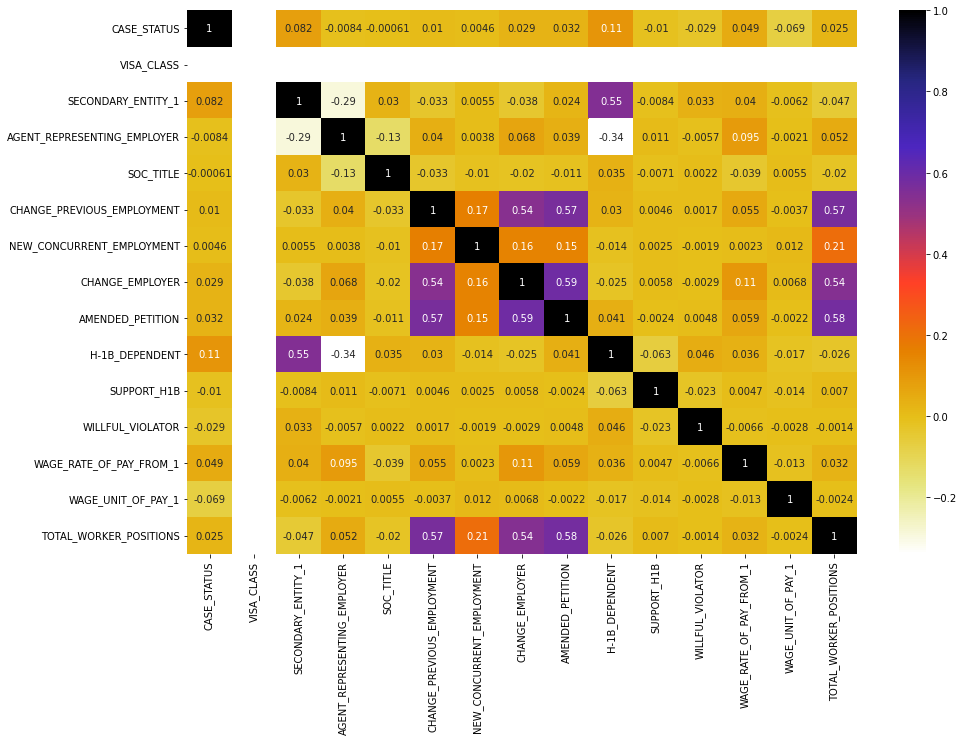

In [69]:
plt.figure(figsize=(15,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [70]:
logidf = df_final[['CASE_STATUS','SECONDARY_ENTITY_1','AGENT_REPRESENTING_EMPLOYER','CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT','CHANGE_EMPLOYER','AMENDED_PETITION','H-1B_DEPENDENT','SUPPORT_H1B','WILLFUL_VIOLATOR','TOTAL_WORKER_POSITIONS']]

In [71]:
logidf.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,TOTAL_WORKER_POSITIONS
154076,1,1,0,1,0,0,0,0,1,1,0,1
94459,1,1,1,1,0,0,0,0,1,1,0,1
364396,1,1,1,0,0,0,0,0,0,1,0,1
560083,1,0,1,0,0,0,0,0,0,1,0,1
226929,1,1,0,0,0,0,0,1,1,1,0,1


In [72]:
X = logidf.drop(['CASE_STATUS'], axis=1)
y = logidf.CASE_STATUS

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.2)

Extra Tree Classifier for Feature Selection

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

In [76]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(X, y)

feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

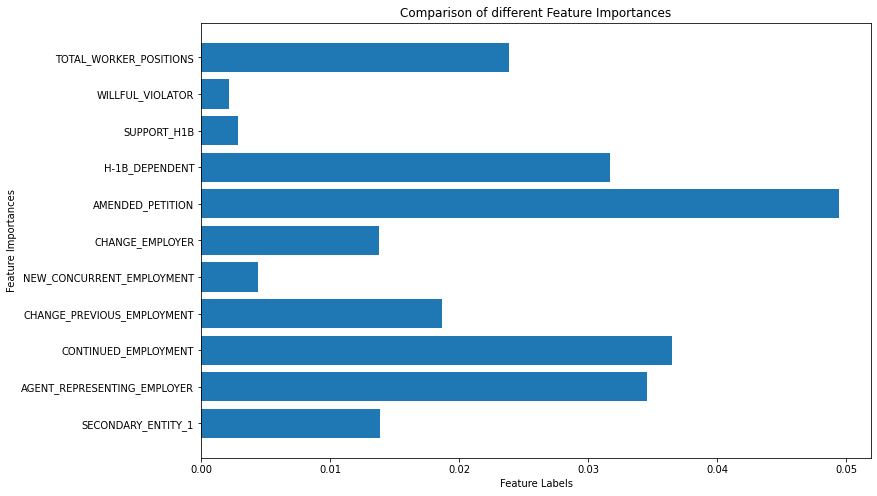

In [77]:
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

<h3>Model Building

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def roc_curve_graph(x_test,y_test,model):
    preds = model. predict_proba(x_test) [:,1]

In [79]:
def metrics_cal(x_test,y_test,prediction,model):    
    print("Model Accuracy:",metrics.accuracy_score(y_test, prediction))
    probs = model.predict_proba(x_test)
    roc_auc = metrics.roc_auc_score(y_test, probs[:,1]) 
    print("ROC:",roc_auc)
    print("Confusion Matrix:",metrics.confusion_matrix(y_test, prediction)) 
    print("Classification Report:", metrics.classification_report(y_test, prediction))  
    print("precision:",metrics.precision_score(y_test, prediction, pos_label=1))  
    print("Recall:",metrics.recall_score(y_test, prediction, pos_label=1))  
    print("F1 Score:",metrics.f1_score(y_test, prediction, pos_label=1))

In [80]:
from sklearn import metrics

def train_test_acc(model,x_train,y_train,x_test,y_test):
    print('Accuracy on training set: {:.2f}'
     .format(model.score(x_train, y_train)))
    print('Accuracy on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

<h3>LogisticRegression

In [81]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [82]:
prediction=logit.predict(x_test)

train_test_acc(logit,x_train,y_train,x_test,y_test)

metrics_cal(x_test,y_test,prediction,logit)

roc_curve_graph(x_test,y_test,logit)

Accuracy on training set: 0.56
Accuracy on test set: 0.56
Model Accuracy: 0.5612457649205108
ROC: 0.577101027266997
Confusion Matrix: [[2564 1270]
 [2097 1743]]
Classification Report:               precision    recall  f1-score   support

           0       0.55      0.67      0.60      3834
           1       0.58      0.45      0.51      3840

    accuracy                           0.56      7674
   macro avg       0.56      0.56      0.56      7674
weighted avg       0.56      0.56      0.56      7674

precision: 0.5784931961500166
Recall: 0.45390625
F1 Score: 0.508682328907048


<h3>naive_bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [84]:
model.score(x_test,y_test)

0.5629397967161845

In [88]:
prediction1 = model.predict(x_test)

train_test_acc(model,x_train,y_train,x_test,y_test)

metrics_cal(x_test,y_test,prediction1,model)

roc_curve_graph(x_test,y_test,model)

Accuracy on training set: 0.56
Accuracy on test set: 0.56
Model Accuracy: 0.5629397967161845
ROC: 0.5673982310141715
Confusion Matrix: [[2662 1172]
 [2182 1658]]
Classification Report:               precision    recall  f1-score   support

           0       0.55      0.69      0.61      3834
           1       0.59      0.43      0.50      3840

    accuracy                           0.56      7674
   macro avg       0.57      0.56      0.56      7674
weighted avg       0.57      0.56      0.56      7674

precision: 0.5858657243816254
Recall: 0.4317708333333333
F1 Score: 0.49715142428785614


<h3>DecisionTreeClassifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(x_train, y_train)

prediction2 = dt_clf.predict(x_test)


In [90]:
train_test_acc(dt_clf,x_train,y_train,x_test,y_test)

metrics_cal(x_test,y_test,prediction1,dt_clf)

roc_curve_graph(x_test,y_test,dt_clf)

Accuracy on training set: 0.58
Accuracy on test set: 0.58
Model Accuracy: 0.5629397967161845
ROC: 0.6034822408602849
Confusion Matrix: [[2662 1172]
 [2182 1658]]
Classification Report:               precision    recall  f1-score   support

           0       0.55      0.69      0.61      3834
           1       0.59      0.43      0.50      3840

    accuracy                           0.56      7674
   macro avg       0.57      0.56      0.56      7674
weighted avg       0.57      0.56      0.56      7674

precision: 0.5858657243816254
Recall: 0.4317708333333333
F1 Score: 0.49715142428785614
